In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Datasets/ECommerce_consumer behaviour.csv')
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [4]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.0195e+06,2.0195e+06,2.0195e+06,2.0195e+06,2.0195e+06,1.89516e+06,2.0195e+06,2.0195e+06,2.0195e+06,2.0195e+06
mean,1.70701e+06,103067,17.1514,2.73537,13.4395,11.386,71.2059,8.36317,0.589743,9.92835
std,985983,59491.2,17.5258,2.09388,4.24101,8.97098,38.2073,7.15006,0.49188,6.28293
min,10,2,1,0,0,0,1,1,0,1
25%,852649,51584,5,1,10,5,31,3,0,4
50%,1.705e+06,102690,11,3,13,8,83,6,1,9
75%,2.55903e+06,154600,24,5,16,15,107,11,1,16
max,3.42108e+06,206209,100,6,23,30,134,137,1,21


In [5]:
df.describe(include='object')

,department,product_name
count,2019501,2019501
unique,21,134
top,produce,fresh fruits
freq,588996,226039


In [6]:
df.isnull().sum()
df['days_since_prior_order'].fillna(0,inplace=True)

In [7]:
department_list = pd.DataFrame(df.groupby('department')['department_id'].mean()).reset_index()
department_list['department_id'] = department_list['department_id'].astype('int')
department_list = department_list.sort_values('department_id')
# department_list

# EDA

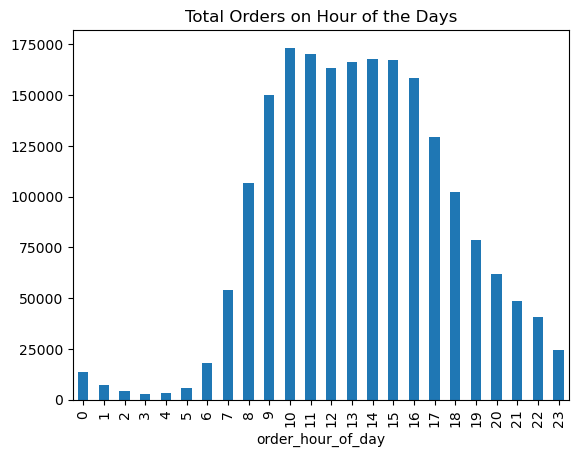

In [8]:
df['order_hour_of_day'].value_counts().sort_index().plot(kind='bar')
plt.title('Total Orders on Hour of the Days')
plt.show()

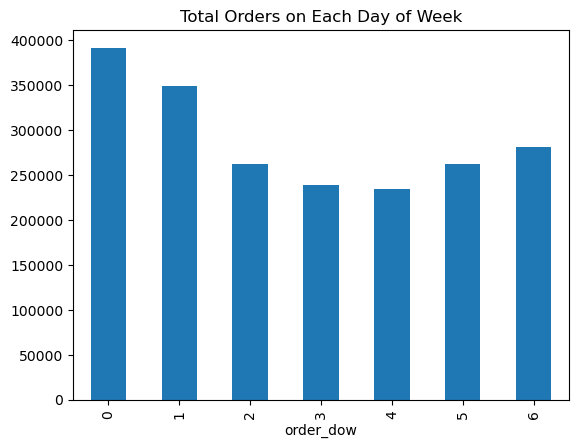

In [9]:
df['order_dow'].value_counts().sort_index().plot(kind='bar')
plt.title('Total Orders on Each Day of Week')
plt.show()

Text(0.5, 1.0, 'Distribution of Order Numbers')

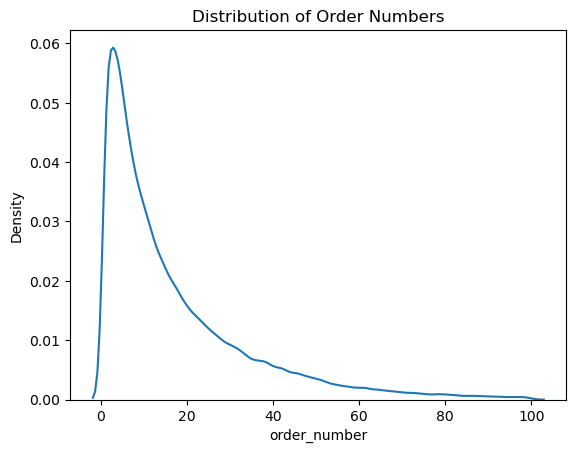

In [10]:
sns.kdeplot(data=df, x='order_number').set_title('Distribution of Order Numbers')

Text(0.5, 1.0, 'Distribution of Days Since Prior Order')

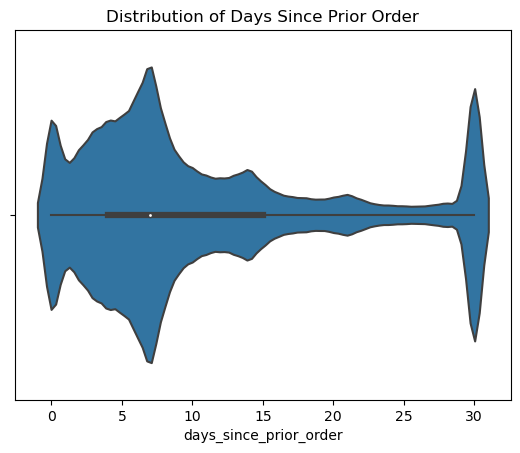

In [11]:
sns.violinplot(data=df, x='days_since_prior_order').set_title('Distribution of Days Since Prior Order')

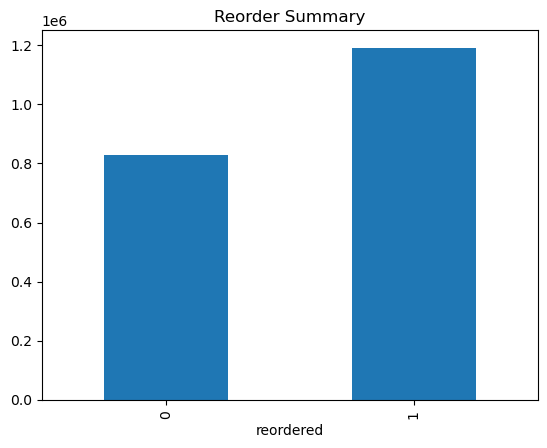

In [12]:
df['reordered'].value_counts().sort_index().plot(kind='bar')
plt.title('Reorder Summary')
plt.show()

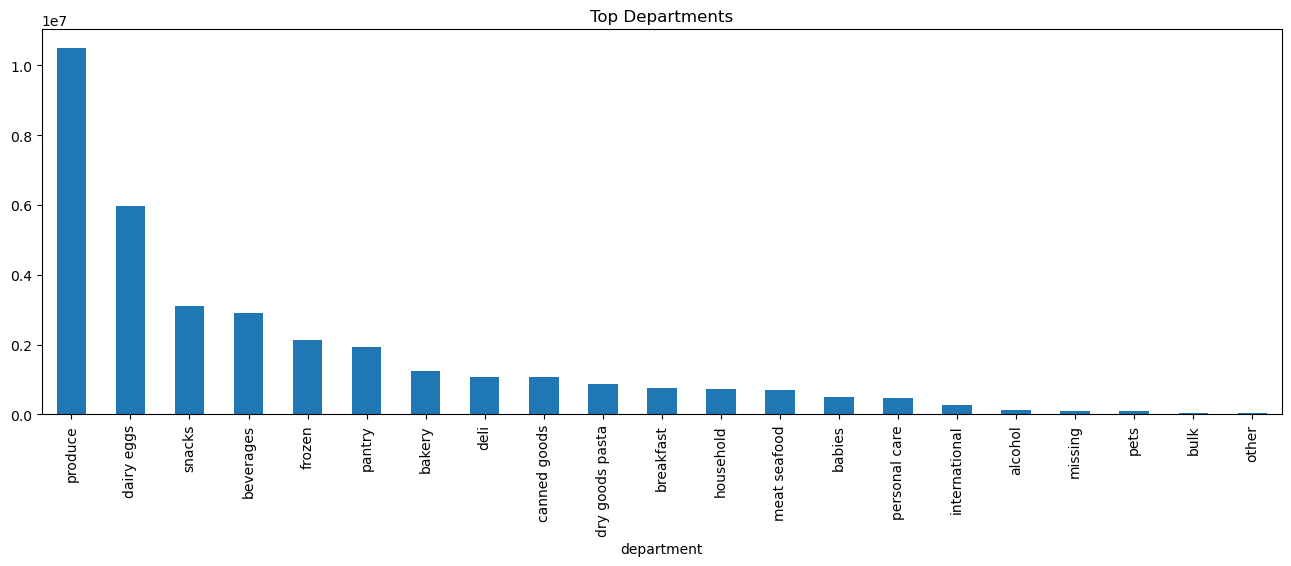

In [13]:
plt.figure(figsize=(16,5))
df.groupby('department')['order_number'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Top Departments')
plt.show()

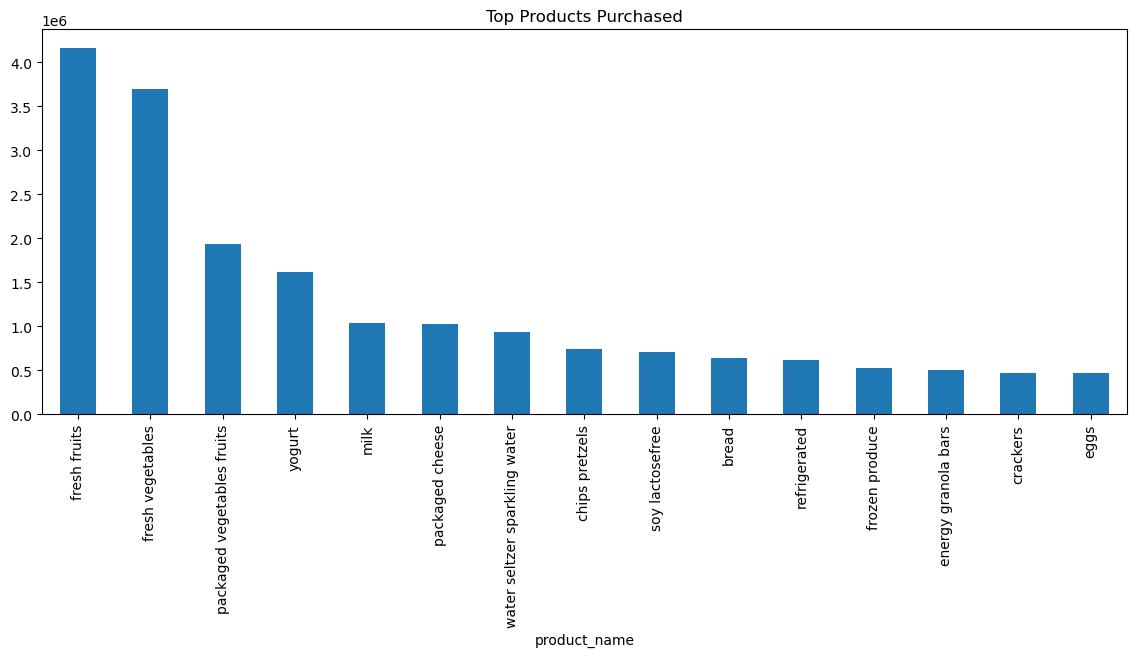

In [14]:
plt.figure(figsize=(14,5))
df.groupby('product_name')['order_number'].sum().sort_values(ascending=False)[:15].plot(kind='bar')
plt.title('Top Products Purchased')
plt.show()

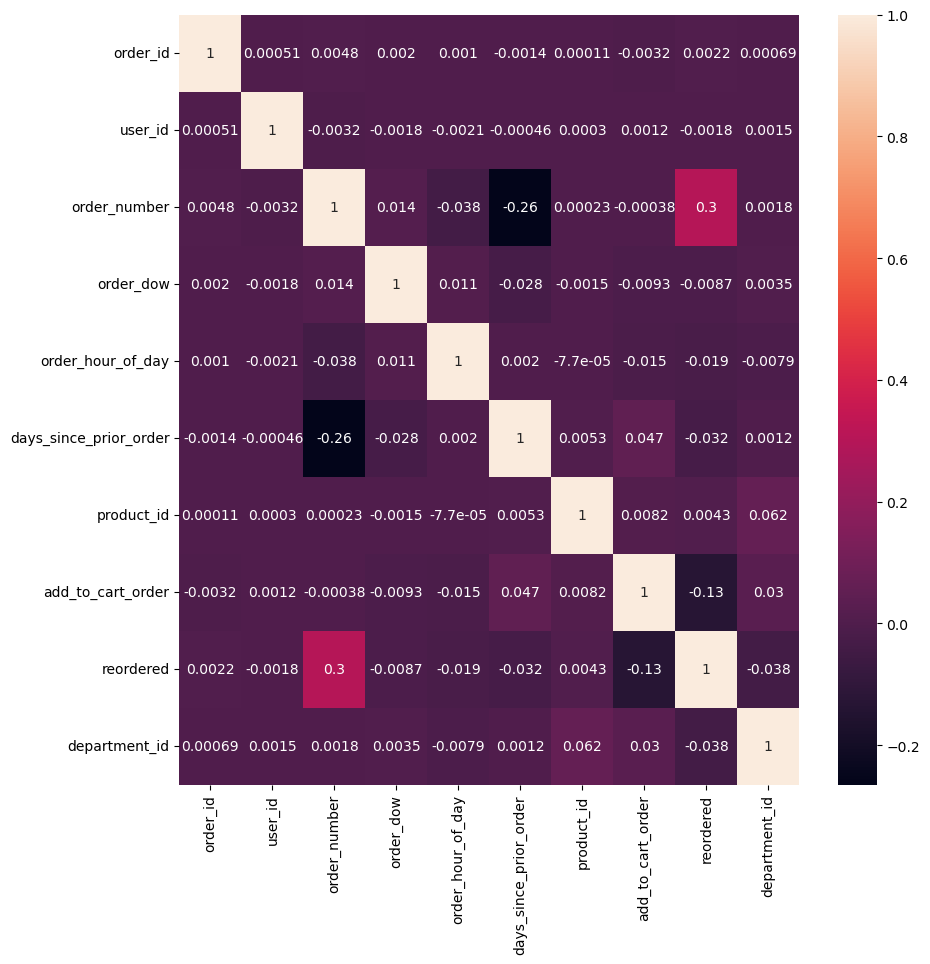

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(exclude='object').corr(),annot=True)
plt.show()

# Kmeans

## Department

In [16]:
X1 = pd.crosstab(df['user_id'], df['department']).values

The inertia for : 2 Cluster is :  7543563.615122325
The inertia for : 3 Cluster is :  6284972.256276799
The inertia for : 4 Cluster is :  5731867.711694684
The inertia for : 5 Cluster is :  5281366.432549851
The inertia for : 6 Cluster is :  4996208.571636027
The inertia for : 7 Cluster is :  4763202.309826396
The inertia for : 8 Cluster is :  4586277.708068188
The inertia for : 9 Cluster is :  4436354.504917305


Text(0.5, 1.0, 'Inertia Plot per k')

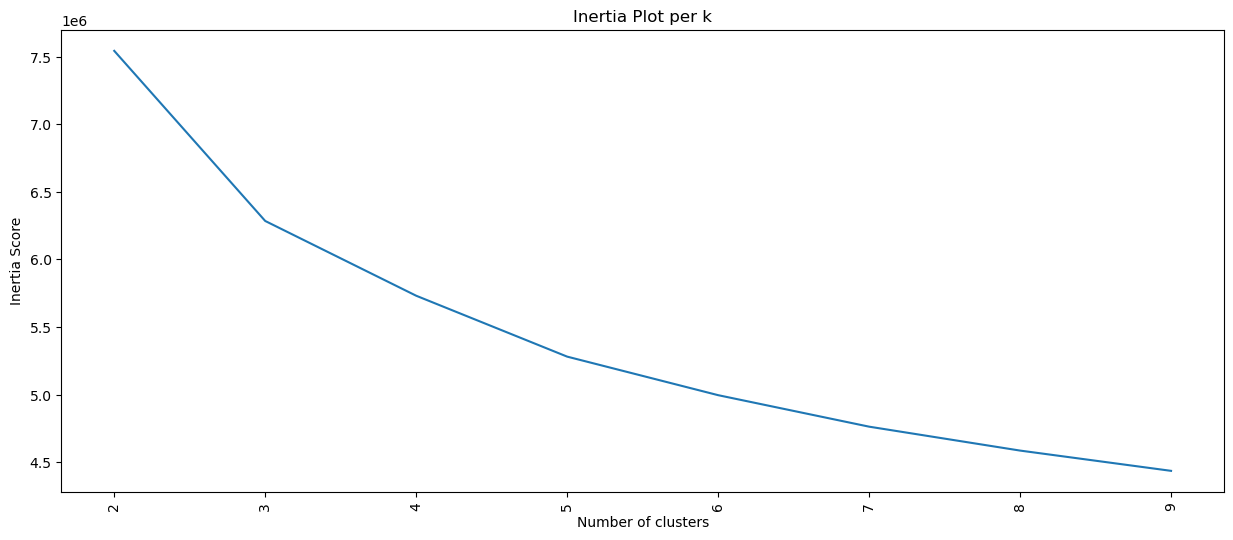

In [17]:
no_of_clusters = range(2,10)
inertia =[]

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=540)
    kmeans = kmeans.fit(X1)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f , "Cluster is : " , u)

fig, (ax1) = plt.subplots(1, figsize =(15,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation ="vertical")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")
plt.title("Inertia Plot per k")

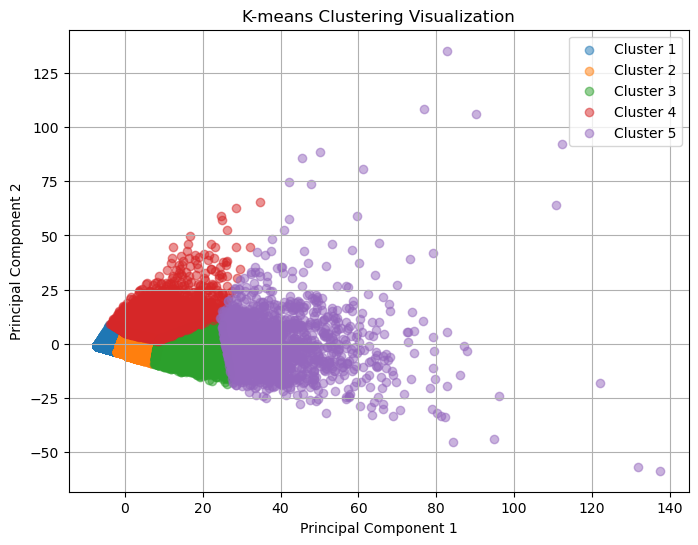

In [18]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X1)

pca = PCA(n_components=2) 
pca_result = pca.fit_transform(X1)

cluster_labels = kmeans.labels_
pca_result_with_clusters = np.column_stack((pca_result, cluster_labels))

plt.figure(figsize=(8, 6))
for cluster in range(kmeans.n_clusters):
    cluster_data = pca_result_with_clusters[pca_result_with_clusters[:, -1] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster+1}', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Visualization')
plt.legend()
plt.grid(True)
plt.show()

## Product

The inertia for : 2 Cluster is :  4913779.258211819
The inertia for : 3 Cluster is :  4530808.57611865
The inertia for : 4 Cluster is :  4339635.199451191
The inertia for : 5 Cluster is :  4189631.839423261
The inertia for : 6 Cluster is :  4072743.2554247295
The inertia for : 7 Cluster is :  3969541.656003928
The inertia for : 8 Cluster is :  3886320.2695819195
The inertia for : 9 Cluster is :  3816778.8233722826
The inertia for : 10 Cluster is :  3748502.4524627356
The inertia for : 11 Cluster is :  3699148.3578856224
The inertia for : 12 Cluster is :  3648621.59702405
The inertia for : 13 Cluster is :  3608475.2565397993
The inertia for : 14 Cluster is :  3562023.2488609394
The inertia for : 15 Cluster is :  3529691.3446218325
The inertia for : 16 Cluster is :  3499031.5054151914
The inertia for : 17 Cluster is :  3468483.9502099026
The inertia for : 18 Cluster is :  3435762.736137629
The inertia for : 19 Cluster is :  3416138.6845129803


Text(0.5, 1.0, 'Inertia Plot per k')

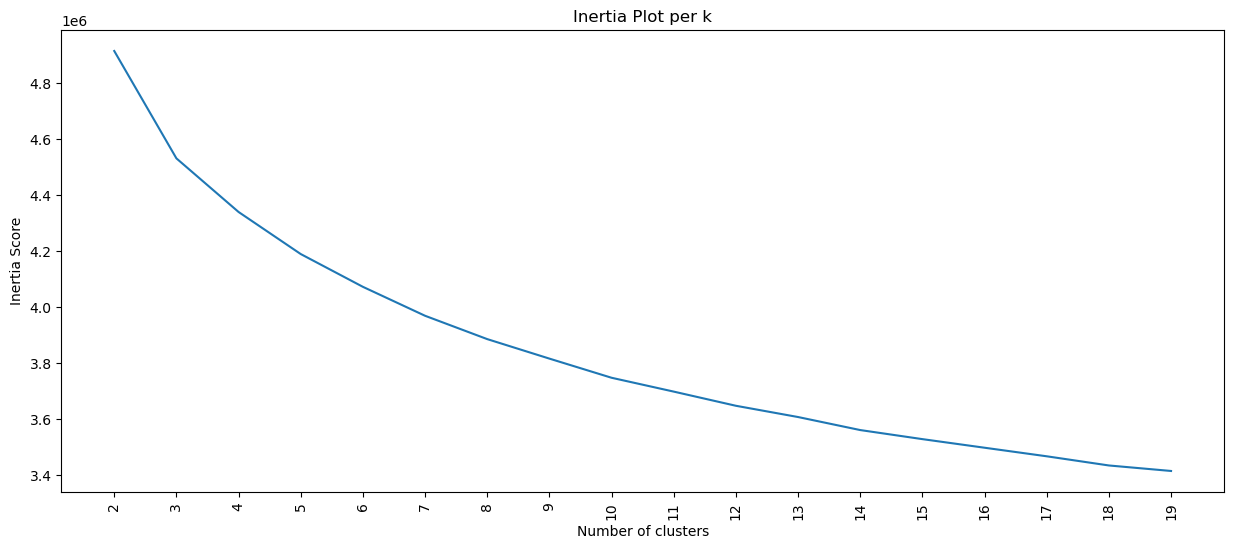

In [19]:
X2 = pd.crosstab(df['user_id'], df['product_name']).values

no_of_clusters = range(2,20)
inertia =[]

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=540)
    kmeans = kmeans.fit(X2)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f , "Cluster is : " , u)

fig, (ax1) = plt.subplots(1, figsize =(15,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation ="vertical")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")
plt.title("Inertia Plot per k")

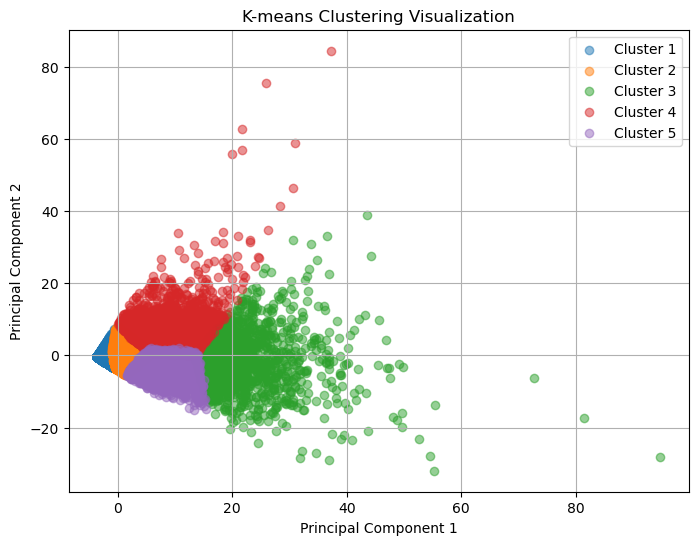

In [20]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X2)

pca = PCA(n_components=2) 
pca_result = pca.fit_transform(X2)

cluster_labels = kmeans.labels_
pca_result_with_clusters = np.column_stack((pca_result, cluster_labels))

plt.figure(figsize=(8, 6))
for cluster in range(kmeans.n_clusters):
    cluster_data = pca_result_with_clusters[pca_result_with_clusters[:, -1] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster+1}', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Visualization')
plt.legend()
plt.grid(True)
plt.show()

## Others

The inertia for : 2 Cluster is :  28098971.703252513
The inertia for : 3 Cluster is :  20351308.770425092
The inertia for : 4 Cluster is :  14359614.321549919
The inertia for : 5 Cluster is :  11348462.96812755
The inertia for : 6 Cluster is :  9784215.84577462
The inertia for : 7 Cluster is :  8739108.251554646
The inertia for : 8 Cluster is :  7838282.594446199
The inertia for : 9 Cluster is :  7119037.783458477
The inertia for : 10 Cluster is :  6586297.108004841
The inertia for : 11 Cluster is :  6241898.723443351
The inertia for : 12 Cluster is :  5908117.811057124
The inertia for : 13 Cluster is :  5574345.623612052
The inertia for : 14 Cluster is :  5322746.419356325
The inertia for : 15 Cluster is :  5107509.843577384
The inertia for : 16 Cluster is :  4922812.911741476
The inertia for : 17 Cluster is :  4737235.526487524
The inertia for : 18 Cluster is :  4585550.048232142
The inertia for : 19 Cluster is :  4426235.919409754


Text(0.5, 1.0, 'Inertia Plot per k')

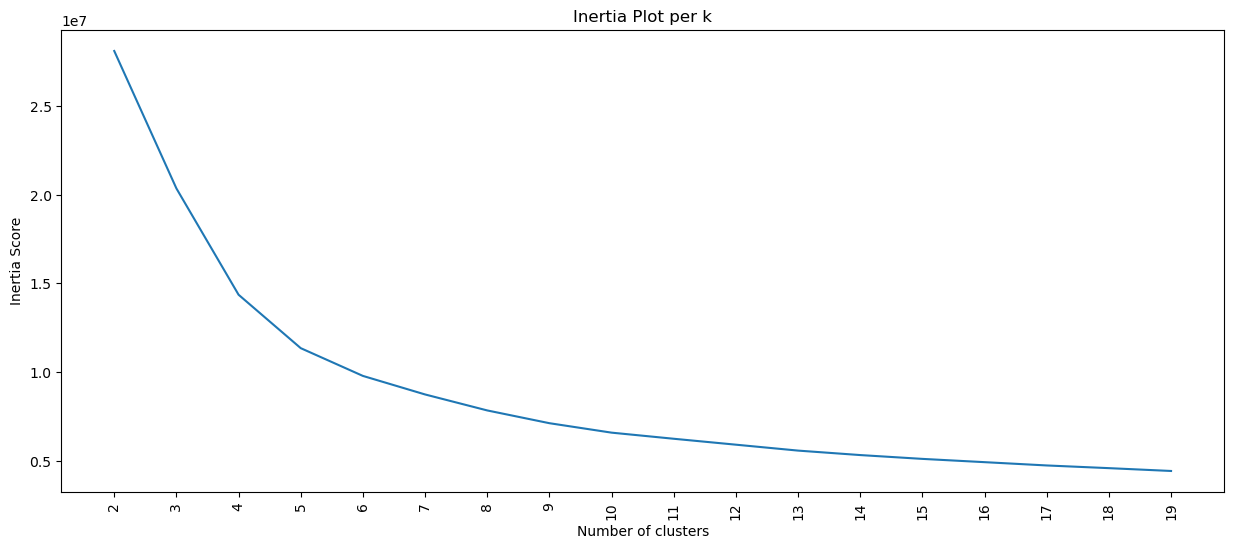

In [21]:
agg_df = df.groupby('user_id').agg({
    'order_number': 'count',  # Number of orders per user
    'order_dow': 'mean',  # Mean day of week of orders per user
    'order_hour_of_day': 'mean',  # Mean hour of day of orders per user
    'days_since_prior_order': 'mean',  # Mean days since prior order per user
    'add_to_cart_order': 'mean',  # Mean add to cart order per user
    'reordered': 'mean'  # Mean reordered per user
}).reset_index()

# Selecting relevant features for clustering
X3 = agg_df.drop(columns=['user_id'])

no_of_clusters = range(2,20)
inertia =[]

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=540)
    kmeans = kmeans.fit(X3)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f , "Cluster is : " , u)

fig, (ax1) = plt.subplots(1, figsize =(15,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation ="vertical")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")
plt.title("Inertia Plot per k")

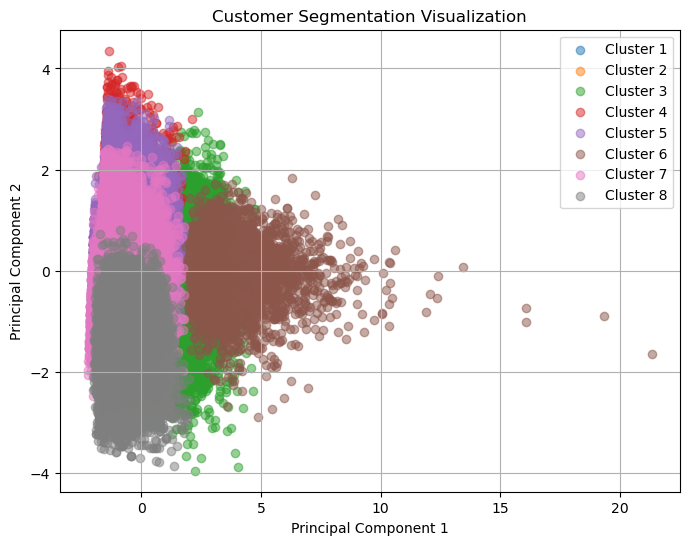

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X3)

pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=8) 
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

plt.figure(figsize=(8, 6))
for cluster in range(kmeans.n_clusters):
    cluster_data = X_pca[cluster_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster+1}', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segmentation Visualization')
plt.legend()
plt.grid(True)
plt.show()